# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


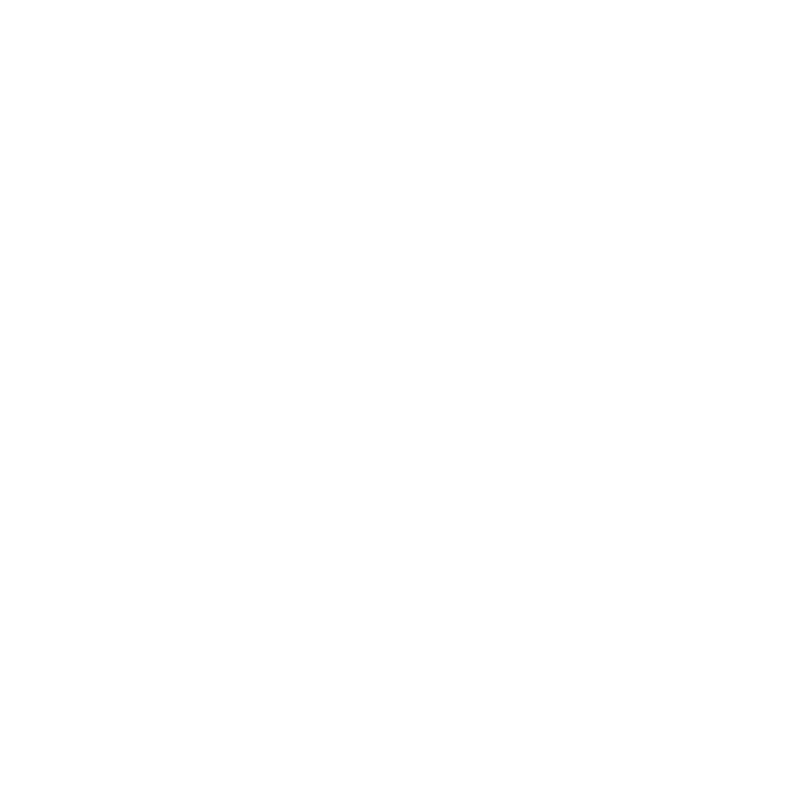

In [128]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [129]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

print(df.head())
mins = df[df['Element']=='TMIN'].pivot_table(values='Data_Value', index='Date', aggfunc='min')
maxs = df[df['Element']=='TMAX'].pivot_table(values='Data_Value', index='Date', aggfunc='max')


            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106


<IPython.core.display.Javascript object>


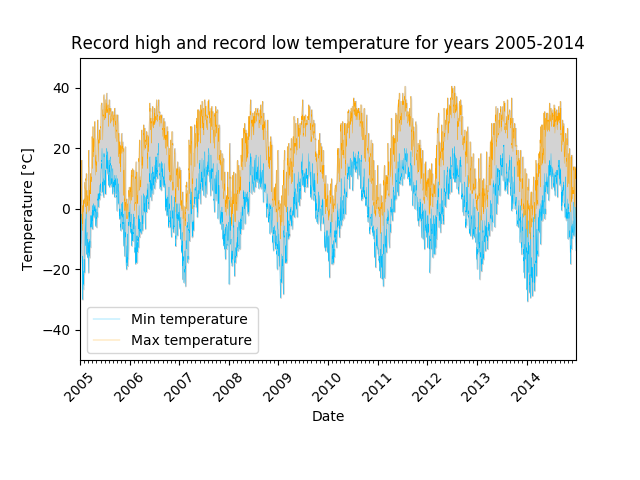

In [130]:
#pd.concat([mins, maxs], axis=1).reset_index()
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dts
minmax = pd.DataFrame({'Min': mins,'Max':maxs})

to_plot = minmax[(minmax.index>='2005-01-01') & (minmax.index<'2015-01-01')]
plt.figure()

xvals = list(map(pd.to_datetime, to_plot.index))

import matplotlib.dates as mdates

plt.plot(xvals, to_plot['Min']*0.1,  linewidth=0.25, color='deepskyblue')
plt.plot(xvals, to_plot['Max']*0.1,  linewidth=0.25, color='orange')
plt.fill_between(xvals, to_plot['Min']*0.1, to_plot['Max']*0.1, color='lightgray') 
plt.gca().xaxis.set_major_locator(dts.YearLocator())
plt.gca().xaxis.set_minor_locator(dts.MonthLocator())

for item in plt.gca().xaxis.get_ticklabels():
    item.set_rotation(45)

plt.ylim(-50, 50)    
plt.gca().set_xlim('2005-01-01', '2014-12-31')

plt.legend(['Min temperature', 'Max temperature'])

plt.xlabel('Date')
plt.ylabel('Temperature [°C]')
plt.title('Record high and record low temperature for years 2005-2014')

plt.subplots_adjust(bottom=0.25)


<IPython.core.display.Javascript object>


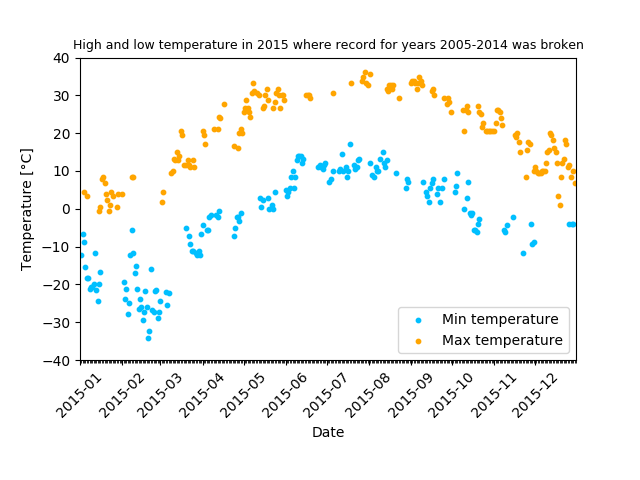

In [163]:
df = minmax[(minmax.index>='2005-01-01') & (minmax.index<'2015-01-01')]
df.index = pd.to_datetime(df.index)

#Exclude 29, Feb
df = df[~((df.index.month==2) & (df.index.day==29))]

dict_of_maxs =  {}
dict_of_mins =  {}


for each_date in np.arange('2005-01-01', '2015-01-01', dtype='datetime64[D]'):
    tuple_month_day = (((each_date.astype(object).month), (each_date.astype(object).day)))
    if tuple_month_day == (2,29):
        continue
    if not tuple_month_day in  dict_of_mins:
        dict_of_mins[tuple_month_day] = df['Min'][each_date]
    if not tuple_month_day in  dict_of_maxs:
        dict_of_maxs[tuple_month_day] = df['Max'][each_date]

mins_to_scatter = {}
maxs_to_scatter = {}

df_2015 = minmax[(minmax.index>='2015-01-01') & (minmax.index<'2016-01-01')]
df_2015.index = pd.to_datetime(df_2015.index)


for each_date in np.arange('2015-01-02', '2016-01-01', dtype='datetime64[D]'):
    tuple_month_day = (((each_date.astype(object).month), (each_date.astype(object).day)))
    if tuple_month_day == (2,29):
        continue
    if df_2015['Min'][each_date] < dict_of_mins[tuple_month_day]:
        mins_to_scatter[each_date] = df_2015['Min'][each_date] * 0.1
    if df_2015['Max'][each_date] > dict_of_maxs[tuple_month_day]:
        maxs_to_scatter[each_date] = df_2015['Max'][each_date] * 0.1
    
plt.figure()
plt.scatter(list(mins_to_scatter.keys()),list(mins_to_scatter.values()), color='deepskyblue', s=10)
plt.scatter(list(maxs_to_scatter.keys()),list(maxs_to_scatter.values()), color='orange', s=10)
plt.gca().set_xlim('2015-01-01', '2015-12-31')
plt.ylim(-40, 40)    
for item in plt.gca().xaxis.get_ticklabels():
    item.set_rotation(45)
    
plt.legend(['Min temperature', 'Max temperature'])
plt.gca().xaxis.set_major_locator(dts.MonthLocator())
plt.gca().xaxis.set_minor_locator(dts.DayLocator())
plt.xlabel('Date')
plt.ylabel('Temperature [°C]')
plt.title('High and low temperature in 2015 where record for years 2005-2014 was broken', size=9)

plt.subplots_adjust(bottom=0.25)

<IPython.core.display.Javascript object>


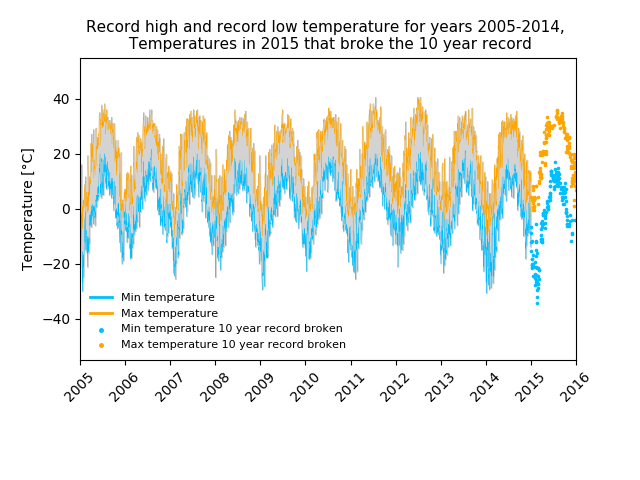

In [164]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as dts

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
mins = df[df['Element']=='TMIN'].pivot_table(values='Data_Value', index='Date', aggfunc='min')
maxs = df[df['Element']=='TMAX'].pivot_table(values='Data_Value', index='Date', aggfunc='max')
minmax = pd.DataFrame({'Min': mins,'Max':maxs})
to_plot = minmax[(minmax.index>='2005-01-01') & (minmax.index<'2015-01-01')]
xvals = list(map(pd.to_datetime, to_plot.index))

plt.figure()
plt.plot(xvals, to_plot['Min']*0.1,  linewidth=0.25, color='deepskyblue', label='Min temperature')
plt.plot(xvals, to_plot['Max']*0.1,  linewidth=0.25, color='orange', label='Max temperature')
plt.fill_between(xvals, to_plot['Min']*0.1, to_plot['Max']*0.1, color='lightgray', label='_nolegend_') 
plt.gca().xaxis.set_major_locator(dts.YearLocator())

for item in plt.gca().xaxis.get_ticklabels():
    item.set_rotation(45)

plt.ylim(-55, 55)    
plt.gca().set_xlim('2005-01-01', '2016-1-1')

plt.ylabel('Temperature [°C]', fontsize=10)
plt.title('Record high and record low temperature for years 2005-2014, \n Temperatures in 2015 that broke the 10 year record', fontsize=11)

plt.subplots_adjust(bottom=0.25)
plt.scatter(list(mins_to_scatter.keys()),list(mins_to_scatter.values()), color='deepskyblue', s=2.5, label='Min temperature 10 year record broken')
plt.scatter(list(maxs_to_scatter.keys()),list(maxs_to_scatter.values()), color='orange', s=2.5, label='Max temperature 10 year record broken')
leg = plt.legend(loc="lower left", fontsize=8, frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)

<IPython.core.display.Javascript object>


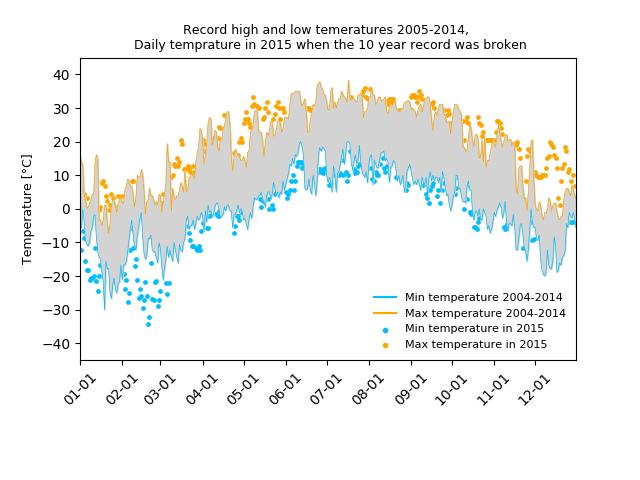

In [160]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
mins = df[df['Element']=='TMIN'].pivot_table(values='Data_Value', index='Date', aggfunc='min')
maxs = df[df['Element']=='TMAX'].pivot_table(values='Data_Value', index='Date', aggfunc='max')
minmax = pd.DataFrame({'Min': mins,'Max':maxs})
minmax = minmax * 0.1

df = minmax[(minmax.index>='2005-01-01') & (minmax.index<'2015-01-01')]
df.index = pd.to_datetime(df.index)


#Exclude 29, Feb
df = df[~((df.index.month==2) & (df.index.day==29))]

dict_of_maxs =  {}
dict_of_mins =  {}


for each_date in np.arange('2005-01-01', '2015-01-01', dtype='datetime64[D]'): 
    if (each_date.astype(object).month, each_date.astype(object).day) == (2,29):
        continue
    month_day = np.datetime64('1900-'+("%02d" % (each_date.astype(object).month))+'-'+("%02d" % (each_date.astype(object).day))) 
    if not month_day in  dict_of_mins:
        dict_of_mins[month_day] = df['Min'][each_date]
    if not month_day in  dict_of_maxs:
        dict_of_maxs[month_day] = df['Max'][each_date]

xvals = list(np.arange('1900-01-01', '1901-01-01', dtype='datetime64[D]'))

plt.figure()
plt.plot(xvals,list(dict_of_mins.values()), linewidth=0.5, color='deepskyblue', label='Min temperature 2004-2014')
plt.plot(xvals,list(dict_of_maxs.values()), linewidth=0.5, color='orange', label='Max temperature 2004-2014')

mins_to_scatter = {}
maxs_to_scatter = {}

minmax_2015 = minmax[(minmax.index>='2015-01-01') & (minmax.index<'2016-01-01')]
minmax_2015.index = pd.to_datetime(minmax_2015.index)

for each_date in np.arange('2015-01-02', '2016-01-01', dtype='datetime64[D]'):
    if (each_date.astype(object).month, each_date.astype(object).day) == (2,29):
        continue
    month_day = np.datetime64('1900-'+("%02d" % (each_date.astype(object).month))+'-'+("%02d" % (each_date.astype(object).day))) 
    if minmax_2015['Min'][each_date] < dict_of_mins[month_day]:
        mins_to_scatter[np.datetime64('1900-'+("%02d" % (each_date.astype(object).month))+'-'+("%02d" % (each_date.astype(object).day))) ] = minmax_2015['Min'][each_date]
    if minmax_2015['Max'][each_date] > dict_of_maxs[month_day]:
        maxs_to_scatter[np.datetime64('1900-'+("%02d" % (each_date.astype(object).month))+'-'+("%02d" % (each_date.astype(object).day))) ] = minmax_2015['Max'][each_date]

#print(mins_to_scatter)
plt.scatter(list(mins_to_scatter.keys()),list(mins_to_scatter.values()), color='deepskyblue', s=6, label='Min temperature in 2015')

plt.scatter(list(maxs_to_scatter.keys()),list(maxs_to_scatter.values()), color='orange', s=6, label='Max temperature in 2015')
plt.ylim(-45, 45)    


plt.fill_between(xvals, list(dict_of_mins.values()), list(dict_of_maxs.values()), color='lightgray', label='_nolegend_') 

plt.gca().set_xlim('1900-01-01', '1900-12-31')

for item in plt.gca().xaxis.get_ticklabels():
     item.set_rotation(45)
    

plt.gca().xaxis.set_major_locator(dts.MonthLocator())

plt.ylabel('Temperature [°C]', size=9)
plt.title('Record high and low temeratures 2005-2014, \n Daily temprature in 2015 when the 10 year record was broken', size=9)



plt.gca().xaxis.set_major_formatter(dts.DateFormatter('%m-%d'))

leg = plt.legend(loc="lower right", fontsize=8, frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(1.5)
    
plt.subplots_adjust(bottom=0.25)